<a href="https://colab.research.google.com/github/sheepjun96/Hands_On-Maching-Learning-by-jun/blob/main/2%EC%9E%A5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B2%98%EC%9D%8C%EB%B6%80%ED%84%B0_%EB%81%9D%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3.5 데이터 다운로드

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# 2.3.6 데이터 구조 훑어보기

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


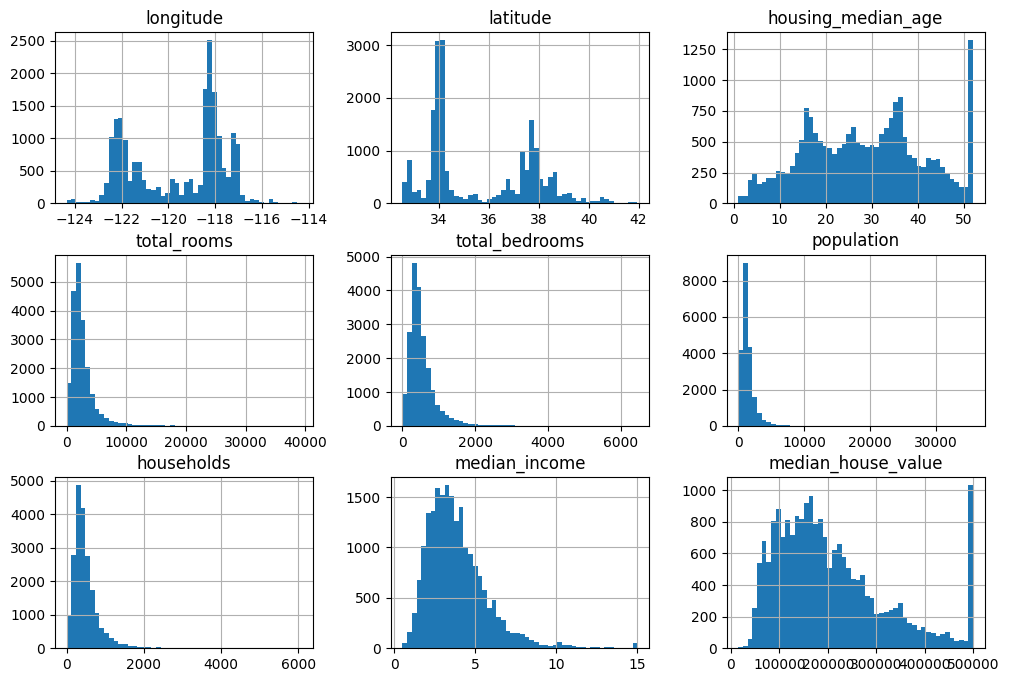

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

# 2.3.7 테스트 세트 만들기

In [6]:
import numpy as np

In [7]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [9]:
len(train_set)

16512

In [10]:
len(test_set)

4128

프로그램을 다시 실행하면 다른 테스트 세트가 생성된다. 여러 번 계속하면 우리는 전체 데이터셋을 보는 것과 같다. 이런 문제를 해결하는 방법은 다음과 같다.

하나는 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러들이는 것

또 다른 방법은 항상 같은 난수 인덱스가 생성되도록 np.random.permutation()을 호출하기 전에 난수 발생기의 초깃값을 지정하는 것이다.


```
np.random.seed(42)
```



하지만 이 두 해법은 다음번에 업데이트된 데이터셋을 사용할 때 문제가 된다. 데이터셋을 업데이트한 후에도 안정적인 훈련/테스트 분할을 하려면 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것이다.

예를 들어 각 샘플마다 식별자의 해시값을 계산하여 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트 세트로 보낼 수 있다. 이렇게 하면 여러 번 반복 실행하면서도 테스트 세트가 동일하게 유지된다.

새로운 테스트 세트는 새 샘플의 20%를 갖게 되지만 이전에 훈련 세트에 있던 샘플은 포함시키지 않을 것이다.

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

주택 데이터셋에는 식별자 컬럼이 없는데, 대신 행의 인덱스를 ID로 사용하면 해결된다.

In [12]:
housing_with_id = housing.reset_index()

train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)



---


In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

In [15]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')
    # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


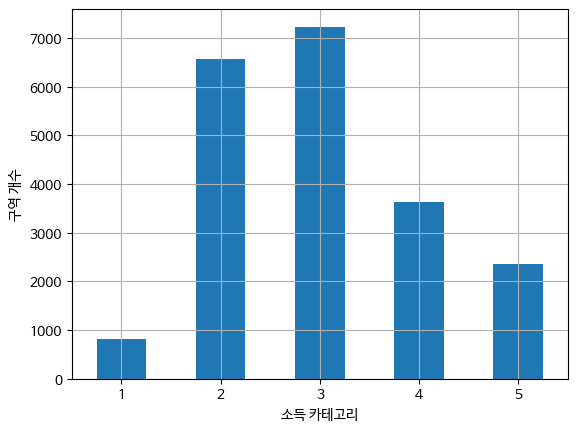

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()

여러 개로 분할하면 모델의 성능을 더 잘 추정할 수 있다.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

첫 번째 분할을 다음과 같이 사용할 수 있다.

In [18]:
strat_train_set, strat_test_set = strat_splits[0]

계층적 샘플링은 자주 사용되기 때문에 하나의 분할이 필요한 경우 train_test_split()함수와 stratify 매개변수를 사용하여 간편하게 만들 수 있다.

In [19]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [21]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체 %": income_cat_proportions(housing),
    "계층 샘플링 %": income_cat_proportions(strat_test_set),
    "랜덤 샘플링 %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["계층 샘플링 오차 %"] = (compare_props["계층 샘플링 %"] /
                                   compare_props["전체 %"] - 1)
compare_props["랜덤 샘플링 오차 %"] = (compare_props["랜덤 샘플링 %"] /
                                  compare_props["전체 %"] - 1)
(compare_props * 100).round(2)

,전체 %,계층 샘플링 %,랜덤 샘플링 %,계층 샘플링 오차 %,랜덤 샘플링 오차 %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


income_cat 특성은 다시 사용하지 않아 삭제한다.

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 2.4 데이터 이해를 위한 탐색과 시각화

In [23]:
housing = strat_train_set.copy()

# 2.4.1 지리적 데이터 시각화하기

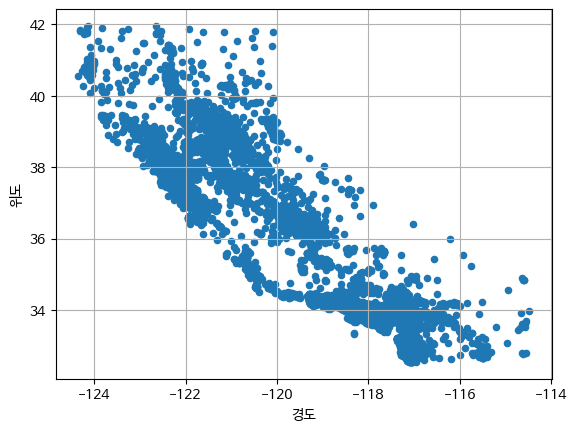

In [50]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)    # grid는 격자
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

alpha = 마커의 투명도로 0~1의 값

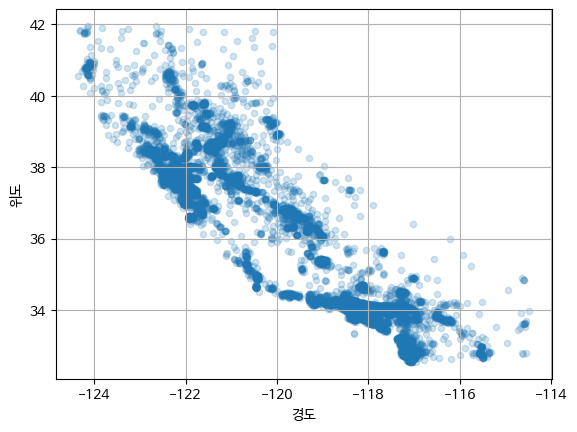

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

원의 반지름은 구역의 인구 (매개변수 s)
색상은 가격 (매개변수 c)
파란색부터 빨간색까지의 범위를 가지는 jet (매개변수 cmap)

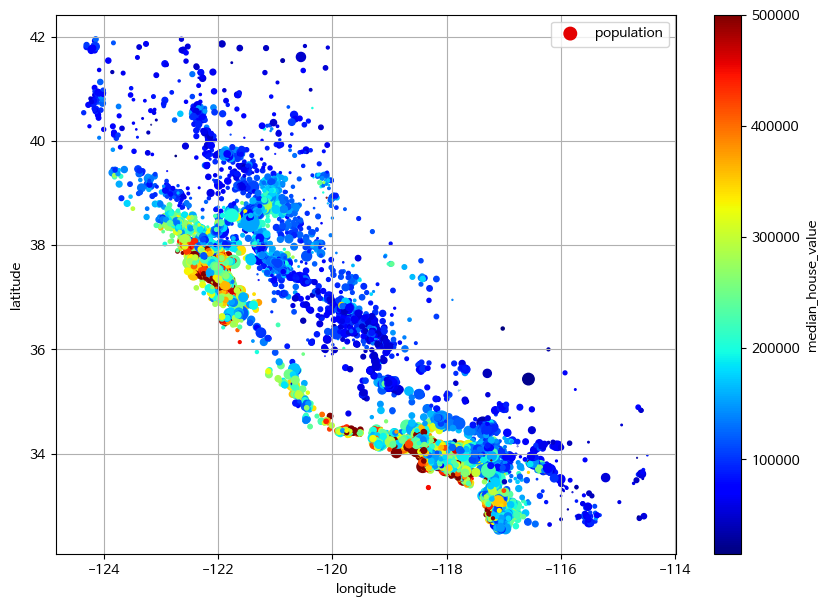

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))
plt.show()

# 2.4.2 상관관계 조사하기

데이터셋이 너무 크지 않으므로 모든 특성 간의 표준 상관계수(피어슨의 r)를 corr() 메서드를 이용해 쉽게 계산할 수 있다.

In [42]:
corr_matrix = housing.corr(numeric_only=True)

In [45]:
corr_matrix["median_house_value"].sort_values(ascending=False)  #ascending = 오름차순

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

상관관계의 범위는 -1부터 1까지이다. 1에 가까울수록 강한 양의 상관관계를 가진다. 예를 들어 중간 주택가격과 중간소득은 올라갈 때 증가한다. 또한 중간 주택가격과 위도는 음의 상관관계를 갖는데, 북쪽으로 갈수록 주택 가격이 내려간다.

특성 사이의 상관관계는 판다스의 scatter_matrix를 통해 특성 간 산점도를 그린다.

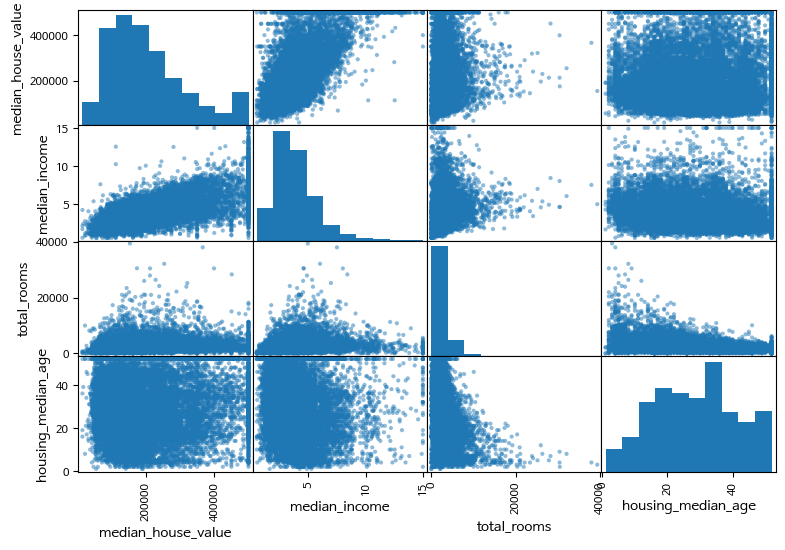

In [48]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(9,6))
plt.show()

산점도 행렬 중 유용해보이는 산점도를 사용한다.

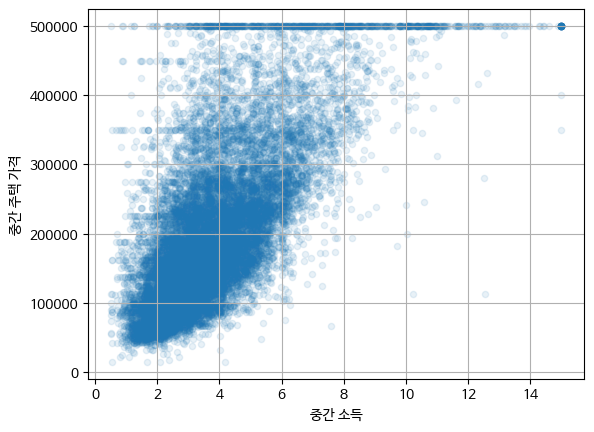

In [49]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.xlabel("중간 소득")
plt.ylabel("중간 주택 가격")
plt.show()

# 2.4.3 특성 조합으로 실험하기

지금까지 머신러닝 알고리즘에 주입하기 전에 정제해야 할 데이터를 확인했고, 특성 사이에 흥미로운 상관관계를 발견했다. 어떤 특성의 분포는 오른쪽 꼬리가 길어서 데이터를 변형하는 것이 좋을 수 있다. (로그 함수나 제곱근을 적용)

머신러닝 알고리즘용 데이터를 준비하기 전에 마지막으로 할 수 있는 일은 특성을 여러 가지로 조합해보는 것이다. 특정 구역의 방 개수는 가구 수를 모른다면 그다지 유용하지 않다. 여기서 가구당 방 개수를 사용하면 다르다.

비슷하게 전체 침실 개수도 그 자체로는 유용하지 않지만, 방 개수와 비교하는 것이 유용할 것이다.

In [54]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [55]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

bedrooms_ratio 특성은 전체 방 개수나 침실 개수보다 중간 주택 가격과의 상관관계가 훨씬 높다. 이는 침실/방의 비율이 낮은 집은 더 비싼 경향이 있다.

또, 가구당 방 개수도 구역 내 전체 방 개수보다 더 유용하다.

# 2.5 머신러닝 알고리즘을 위한 데이터 준비